<a href="https://colab.research.google.com/github/sahar7888/NLP_LLM_Projects/blob/main/Multimodal_Querry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.

In [2]:
!pip install open_clip_torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x

In [5]:
#%% packages
import os
import numpy as np
from matplotlib import pyplot as plt

import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
import open_clip

In [6]:
#%% load model
# source: https://pypi.org/project/open-clip-torch-any-py3/
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='laion400m_e32')

100%|███████████████████████████████████████| 605M/605M [00:08<00:00, 69.0MiB/s]


In [7]:
#%% prepare vector db
chroma_db = chromadb.Client()

In [3]:
# import zipfile
# import os

# # Replace 'your_file.zip' with the name of your uploaded file
# zip_file_path = 'dogs.zip'

# # Create a directory to extract the contents
# extract_dir = '/content'


# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print("Files extracted to:", extract_dir)


Files extracted to: /content


In [38]:
img_loader = ImageLoader()
multimodal_embedding_fn = OpenCLIPEmbeddingFunction()
chroma_collection = chroma_db.get_or_create_collection("dogs", embedding_function=multimodal_embedding_fn, data_loader=img_loader)
# %% add images to DB
img_folder = "/content/dogs"
img_files = os.listdir(img_folder)
img_files = [f"{img_folder}/{img_file}" for img_file in img_files]
chroma_collection.add( ids=img_files, documents=img_files, uris=img_files)

In [39]:
# %% helper function to show query results
def show_query_results(query_list:list, query_result:dict):
    res_count = len(query_result['ids'][0])
    for i in range(len(query_list)):
        print(f"Query: {query_list[i]}")
        for j in range(res_count):
            id = query_result['ids'][i][j]
            distance = query_result['distances'][i][j]
            data = query_result['data'][i][j]
            uri = query_result['uris'][i][j]
            print(f"Result {j}: {uri} with distance: {np.round(distance, 2)}")
            plt.imshow(data)
            plt.axis("off")
            plt.show()

In [40]:

# %% Query Text
# query_list = ["dog in grassland"]
query_list = ["dog in black fur"]
# query_list = ["dog, water"]
# query_list = ["akita"]

Query: dog in black fur
Result 0: /content/dogs/affenpinscher_3 (2).jpg with distance: 0.8


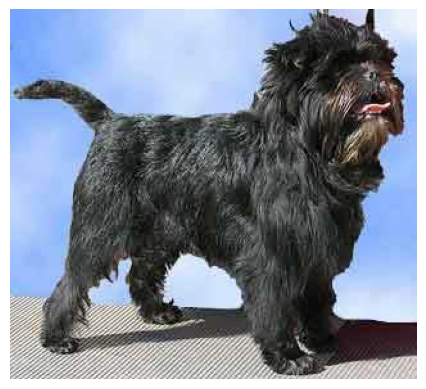

Result 1: /content/dogs/mastiff_1 (2).jpg with distance: 0.92


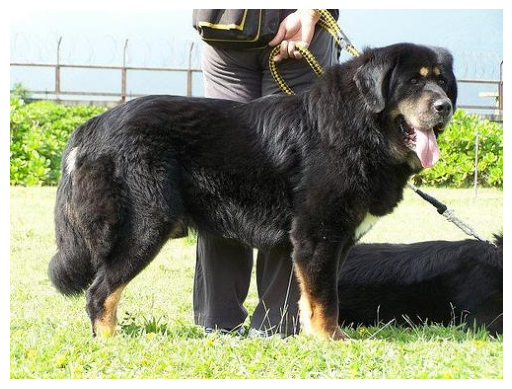

Result 2: /content/dogs/corgi_13 (2).jpg with distance: 0.96


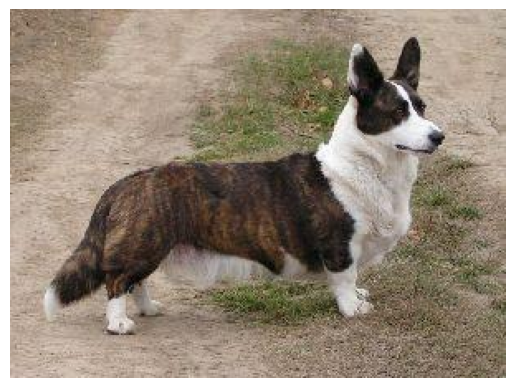

In [41]:
query_result = chroma_collection.query(query_texts = query_list,
                                       n_results=1,
                                       include=['documents', 'distances', 'metadatas', 'data', 'uris'],)
show_query_results(query_list, query_result)

Query: /content/dogs/akita_1(2).jpg
Result 0: /content/dogs/akita_1 (2).jpg with distance: 0.0


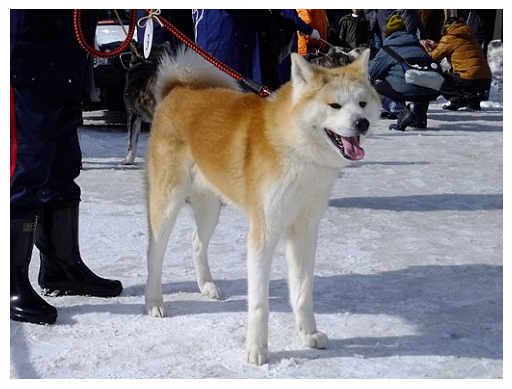

Result 1: /content/dogs/akita_3 (2).jpg with distance: 0.0


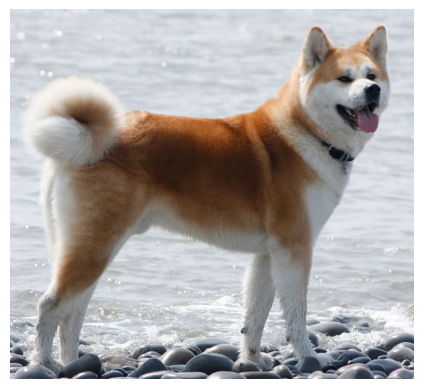

In [13]:
# %% Query Image
query_list = ["/content/dogs/akita_1(2).jpg"]
query_result = chroma_collection.query(query_images=query_list, n_results=2, include=['documents', 'distances', 'metadatas', 'data', 'uris'],)

# %%
show_query_results(query_list, query_result)

In [14]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=313a3756cff451c3ac2dc6b3b1ac2cf0f779a4edf485db6b40cb38e531c17e28
  Stored in directory: /root/.cache/pip/wheels/bd/65/9a/671fc6dcde07d4418df0c592f8df512b26d7a0029c2a23dd81
Successfully built ffmpy
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0


In [44]:
%%writefile app.py

import gradio as gr
import os
import numpy as np
from matplotlib import pyplot as plt
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
import open_clip

# Load model
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='laion400m_e32')

# Prepare vector db
chroma_db = chromadb.Client()

img_loader = ImageLoader()
multimodal_embedding_fn = OpenCLIPEmbeddingFunction()
chroma_collection = chroma_db.get_or_create_collection("dogs", embedding_function=multimodal_embedding_fn, data_loader=img_loader)

# Add images to DB
img_folder = "/dogs"
img_files = os.listdir(img_folder)
img_files = [f"{img_folder}/{img_file}" for img_file in img_files]
chroma_collection.add(ids=img_files, documents=img_files, uris=img_files)

# Helper function to show query results
def show_query_results(query_list, query_result):
    results = []
    res_count = len(query_result['ids'][0])
    for i in range(len(query_list)):
        for j in range(res_count):
            id = query_result['ids'][i][j]
            distance = query_result['distances'][i][j]
            uri = query_result['uris'][i][j]
            img_path = uri  # Use the URI as the image path
            results.append((f"Query: {query_list[i]}", f"Result {j}: {uri} with distance: {np.round(distance, 2)}", img_path))
    return results

# Gradio function
def query_text(input_text):
    if input_text:
        query_list = [input_text]
        query_result = chroma_collection.query(query_texts=query_list, n_results=1, include=['documents', 'distances', 'metadatas', 'data', 'uris'])
        results = show_query_results(query_list, query_result)
        formatted_results = [(result[0], result[1], result[2]) for result in results]
        return formatted_results[0][1], formatted_results[0][2]
    return "No results", None

# Example queries
example_queries = [
    ["dog in grassland"],
    ["dog in black fur"],
    ["dog, water"],
    ["akita"]
]

# Gradio interface
interface = gr.Interface(
    fn=query_text,
    inputs=gr.Textbox(lines=1, placeholder="Enter text query..."),
    outputs=[
        gr.Textbox(label="Result"),
        gr.Image(type="filepath", label="Image")
    ],
    examples=example_queries,
    title="Text to Image Query Interface"
)

interface.launch()


Writing app.py


In [45]:
%%writefile requirements.txt
chromadb == 0.5.0
gradio == 3.45.0
torch==2.3.0
pandas==2.2.2
matplotlib==3.9.0
open_clip_torch==2.24.0

Writing requirements.txt
